In [83]:
import pandas as pd

In [84]:
path = '/media/flor/ce9d3b3b-3afb-4b6d-a765-a6c5eeadffe0/flor/Pandemov/challenge/CMU/mapa/signals/'

In [85]:
cd /media/flor/ce9d3b3b-3afb-4b6d-a765-a6c5eeadffe0/flor/Pandemov/challenge/CMU/mapa/signals

/media/flor/ce9d3b3b-3afb-4b6d-a765-a6c5eeadffe0/flor/Pandemov/challenge/CMU/mapa/signals


In [86]:
signals = {}
signals['c0'] = 'Away from Home 6hr+ (SG)'
signals['c1'] = 'Away from Home 3-6hr+ (SG)'
signals['c2'] = 'Doctor Visits'
signals['c3'] = 'Symptoms (FB)'
signals['c4'] = 'Symptoms in Community (FB)'
signals['c5'] = 'Combined'
signals['c6'] = 'COVID-19 Antigen Tests (Quidel)'
signals['c7'] = 'Hospital Admissions'
signals['c8'] = 'Cases'
signals['c9'] = 'Deaths'

In [87]:
ls

countys/  states/


In [88]:
import os

In [89]:
cd countys/

/media/flor/ce9d3b3b-3afb-4b6d-a765-a6c5eeadffe0/flor/Pandemov/challenge/CMU/mapa/signals/countys


In [90]:
os.listdir()

['c8countys.csv',
 'c4countys.csv',
 'c1countys.csv',
 'c6countys.csv',
 'countys.csv',
 'c11countys.csv',
 'c9countys.csv',
 'results',
 'c5countys.csv',
 'c2countys.csv',
 'c7countys.csv',
 'c10countys.csv']

In [91]:
fns = os.listdir()

In [92]:
fns.remove('results')

In [93]:
fns

['c8countys.csv',
 'c4countys.csv',
 'c1countys.csv',
 'c6countys.csv',
 'countys.csv',
 'c11countys.csv',
 'c9countys.csv',
 'c5countys.csv',
 'c2countys.csv',
 'c7countys.csv',
 'c10countys.csv']

In [94]:
cs = pd.read_csv('countys.csv')

In [95]:
cs.head()

,county-level,place
0,FIPS code,name
1,------------,--------------
2,1000,Alabama
3,1001,Autauga County
4,1003,Baldwin County


In [96]:
dfs = []
for i in range(1,12):
    if i != 3 :
        dfs.append(pd.read_csv('c' + str(i) + 'countys.csv'))

In [97]:
dfs[0].head()

,Unnamed: 0,geo_value,signal,time_value,direction,issue,lag,value,stderr,sample_size,geo_type,data_source
0,0,1001,full_time_work_prop,2020-02-01,0.0,2020-06-23,143,0.026371,0.002084,32,county,safegraph
1,1,1003,full_time_work_prop,2020-02-01,0.0,2020-06-23,143,0.034427,0.001842,94,county,safegraph
2,2,1005,full_time_work_prop,2020-02-01,-1.0,2020-06-23,143,0.027970,0.003181,23,county,safegraph
3,3,1007,full_time_work_prop,2020-02-01,0.0,2020-06-23,143,0.034143,0.003634,15,county,safegraph
4,4,1009,full_time_work_prop,2020-02-01,0.0,2020-06-23,143,0.037567,0.003120,35,county,safegraph


In [98]:
uniqCountys = {}
for i,df in enumerate(dfs):
    uniqCountys['c'+str(i)] = len(df.geo_value.unique())

In [99]:
uniqCountys

{'c0': 3229,
 'c1': 3229,
 'c2': 2514,
 'c3': 1536,
 'c4': 1254,
 'c5': 2561,
 'c6': 1064,
 'c7': 1135,
 'c8': 3193,
 'c9': 3193}

In [100]:
max(uniqCountys.values())

3229

In [101]:
signals

{'c0': 'Away from Home 6hr+ (SG)',
 'c1': 'Away from Home 3-6hr+ (SG)',
 'c2': 'Doctor Visits',
 'c3': 'Symptoms (FB)',
 'c4': 'Symptoms in Community (FB)',
 'c5': 'Combined',
 'c6': 'COVID-19 Antigen Tests (Quidel)',
 'c7': 'Hospital Admissions',
 'c8': 'Cases',
 'c9': 'Deaths'}

vemos que las dos primeras seniales ('Away from Home 6hr+ (SG)' y 'Away from Home 3-6hr+ (SG)') son las que mas countys completaron

vamos a armar un DF tomando fechas, valor y error de cada DF

In [102]:
for df in dfs:
    df['time_value'] = pd.to_datetime(df['time_value'])

In [103]:
for i,df in enumerate(dfs):
    df = df[['geo_value','time_value', 'value', 'stderr', 'sample_size']]
    dfs[i] = df

In [154]:
type(dfs[0].geo_value[0])

numpy.int64

In [155]:
gb = dfs[0].groupby("geo_value")
gb.get_group(1001).set_index("time_value").head()

,geo_value,value,stderr,sample_size
time_value,,,,
2020-02-01,1001,0.026371,0.002084,32
2020-02-02,1001,0.031412,0.002785,32
2020-02-03,1001,0.099400,0.006550,32
2020-02-04,1001,0.111132,0.006024,32
2020-02-05,1001,0.133719,0.005962,32


In [163]:
dfs[3].isnull().sum()

geo_value       0
time_value      0
value           0
stderr         32
sample_size     0
dtype: int64

In [157]:
act_min_wage = pd.DataFrame()

for name, group in dfs[3].groupby("geo_value"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("time_value")[["value"]].rename(columns={"value":name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("time_value")[["value"]].rename(columns={"value":name}))

In [169]:
act_min_wage.head()

,1000,1001,1003,1009,1015,1017,1019,1021,1031,1033,...,56001,56005,56013,56021,56025,56029,56033,56037,56041,72000
time_value,,,,,,,,,,,,,,,,,,,,,
2020-04-06,1.169338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-04-07,1.033339,NaN,0.506389,NaN,1.015598,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.876777,4.052677,NaN,NaN,NaN,NaN,0.0
2020-04-08,0.910949,0.000000,0.600327,0.384287,0.932807,NaN,NaN,0.942413,1.153045,0.004807,...,1.623130,0.483092,2.441575,1.052381,2.629058,NaN,0.491164,0.457303,NaN,0.0
2020-04-09,0.856032,0.144727,0.625648,0.301343,0.820023,1.273615,NaN,0.749646,1.396996,0.510542,...,1.181538,1.388889,1.812675,0.884728,2.722830,0.230578,0.368183,0.572139,NaN,0.0
2020-04-10,0.856733,0.130628,0.596787,0.321926,0.841610,1.200768,0.142046,0.681605,1.713515,0.638970,...,1.047013,1.827095,1.619848,0.795380,2.476777,0.204149,0.956615,0.703532,0.0,0.0


In [158]:
act_min_wage.describe()

,1000,1001,1003,1009,1015,1017,1019,1021,1031,1033,...,56001,56005,56013,56021,56025,56029,56033,56037,56041,72000
count,168.000000,90.000000,167.000000,8.000000,87.000000,6.000000,4.000000,7.000000,75.000000,9.000000,...,55.000000,32.000000,33.000000,167.000000,159.000000,9.000000,12.000000,7.000000,3.0,96.000000
mean,0.941375,0.654594,0.912708,0.323138,0.907616,0.965727,0.197382,0.630597,0.575304,0.591663,...,0.567331,0.857616,0.518579,0.693812,0.720568,0.452835,0.519933,0.575543,0.0,0.197723
std,0.325047,0.509532,0.539188,0.048173,0.640919,0.396612,0.114317,0.294128,0.559196,0.418795,...,0.471021,0.851944,0.660789,0.437598,0.643880,0.352473,0.546800,0.118765,0.0,0.344458
min,0.326025,0.000000,0.000000,0.250972,0.000000,0.296705,0.138179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.197684,0.000000,0.407020,0.0,0.000000
25%,0.646423,0.215060,0.538549,0.299572,0.457300,0.788989,0.139891,0.677770,0.033808,0.510542,...,0.096877,0.000000,0.000000,0.346074,0.279350,0.204149,0.000000,0.490133,0.0,0.000000
50%,0.946529,0.638003,0.818349,0.316226,0.879441,1.182675,0.141254,0.681605,0.448212,0.631504,...,0.526123,0.813062,0.303397,0.615438,0.577537,0.239283,0.429673,0.572139,0.0,0.000000
75%,1.230604,1.049547,1.378987,0.337516,1.173236,1.196367,0.198744,0.717312,0.923220,0.658612,...,0.939229,1.375946,0.629974,0.997992,1.032659,0.583795,0.930174,0.682921,0.0,0.312303
max,1.614155,2.063004,2.051603,0.399871,2.505498,1.273615,0.368840,0.942413,1.921400,1.372610,...,1.623130,3.432014,2.441575,1.785798,4.052677,1.237487,1.615521,0.703532,0.0,1.606426


In [164]:
issue_df = dfs[3][dfs[3]['value'] ==0]

In [165]:
issue_df

,geo_value,time_value,value,stderr,sample_size
11,4025,2020-04-06,0.0,0.424617,115.4545
17,6001,2020-04-06,0.0,0.369119,133.0790
49,12057,2020-04-06,0.0,0.269604,182.0031
50,12071,2020-04-06,0.0,0.415725,118.3756
53,12099,2020-04-06,0.0,0.301169,164.3538
...,...,...,...,...,...
148073,53057,2020-09-20,0.0,0.420864,111.7525
148078,53077,2020-09-20,0.0,0.271083,181.6812
148080,54003,2020-09-20,0.0,0.422520,111.9882
148083,54061,2020-09-20,0.0,0.368945,128.2002


In [167]:
len(issue_df.geo_value.unique())

984

In [159]:
act_min_wage.corr().head()

,1000,1001,1003,1009,1015,1017,1019,1021,1031,1033,...,56001,56005,56013,56021,56025,56029,56033,56037,56041,72000
1000,1.000000,-0.050575,0.414246,0.048060,0.477318,0.817324,0.043536,0.962734,0.242858,-0.880725,...,0.170260,0.268066,0.691534,0.102810,-0.243322,-0.511200,0.359359,-0.005175,NaN,-0.165399
1001,-0.050575,1.000000,0.083728,-0.619991,-0.001192,-0.143259,0.653128,-0.489154,-0.130969,0.845715,...,0.187647,0.026227,-0.363072,-0.320501,-0.191058,0.563405,-0.473989,0.395398,NaN,-0.159255
1003,0.414246,0.083728,1.000000,-0.030214,0.376899,-0.927068,0.681113,-0.933156,0.170750,0.841798,...,0.192297,0.629282,0.579064,-0.009348,-0.180181,-0.040670,0.713610,-0.270226,NaN,-0.251146
1009,0.048060,-0.619991,-0.030214,1.000000,-0.514142,-0.693143,-0.968666,-0.467853,-0.726625,-0.554179,...,0.537041,-0.450323,0.606849,0.640916,0.003171,0.212232,0.395320,-0.269453,NaN,NaN
1015,0.477318,-0.001192,0.376899,-0.514142,1.000000,-0.737142,0.996693,-0.050713,0.281690,0.500728,...,0.048828,0.766395,0.495786,0.109090,-0.012169,-0.547789,0.846263,-0.893839,NaN,0.100711


In [168]:
act_min_wage.replace(0, np.NaN).dropna(axis=1).corr().head()

,1000,1073,1097,2020,4013,4019,4021,5000,5007,5143,...,51810,53000,53033,53053,54000,54039,55000,55009,55079,56000
1000,1.000000,0.537362,0.578652,0.142585,0.244273,0.200873,0.288596,0.539965,-0.152733,0.493249,...,0.154522,0.416594,-0.406329,0.131344,0.171960,0.260477,0.476744,0.208453,0.019458,0.103622
1073,0.537362,1.000000,0.272791,0.297229,0.274385,0.362492,0.168433,0.292884,-0.087778,0.254150,...,0.171190,0.421000,-0.156813,0.398518,0.070941,0.163974,0.364994,0.219558,0.109811,0.102807
1097,0.578652,0.272791,1.000000,0.027925,0.430922,0.205535,0.381572,0.408732,-0.106583,0.215155,...,0.101292,0.183487,-0.115393,0.153111,0.130473,0.021078,0.338290,-0.187537,0.293908,-0.124232
2020,0.142585,0.297229,0.027925,1.000000,-0.184794,-0.012768,-0.116827,0.087674,-0.122568,-0.089432,...,0.084954,0.012027,0.008337,0.243282,-0.083021,0.421894,0.200942,0.325956,0.113898,0.096194
4013,0.244273,0.274385,0.430922,-0.184794,1.000000,0.645983,0.386527,0.171632,-0.217980,0.331474,...,0.060415,0.046355,0.003607,0.176502,0.169777,-0.062620,-0.085533,-0.249538,0.097591,-0.190096


In [170]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr()

In [171]:
for problem in issue_df['geo_value'].unique():
    if problem in min_wage_corr.columns:
        print("Missing something here....")

In [172]:
grouped_issues = issue_df.groupby("geo_value")

In [177]:
min_wage_corr.columns = [str(c) for c in min_wage_corr]

In [188]:
min_wage_corr.columns = [int(c) for c in min_wage_corr]

In [200]:
min_wage_corr.to_csv(path+'countys/results/corr.csv')

In [191]:
min_wage_corr[1000]

1000     1.000000
1073     0.537362
1097     0.578652
2020     0.142585
4013     0.244273
           ...   
54039    0.260477
55000    0.476744
55009    0.208453
55079    0.019458
56000    0.103622
Name: 1000, Length: 151, dtype: float64

In [173]:
for state, data in grouped_issues:
    if data['value'].sum() != 0.0:
        print("Some data found for", state)

In [179]:
corr = min_wage_corr.iloc[:,:50]

In [180]:
corr

,1000,1073,1097,2020,4013,4019,4021,5000,5007,5143,...,17000,17031,17089,17197,18000,18003,18089,18097,19000,19113
1000,1.000000,0.537362,0.578652,0.142585,0.244273,0.200873,0.288596,0.539965,-0.152733,0.493249,...,0.461176,-0.397203,-0.010706,0.214284,0.365190,0.049189,-0.242256,-0.044781,0.446612,0.078383
1073,0.537362,1.000000,0.272791,0.297229,0.274385,0.362492,0.168433,0.292884,-0.087778,0.254150,...,0.366439,-0.055242,0.271689,0.316422,0.450073,0.214307,0.042080,0.070798,0.196886,0.107781
1097,0.578652,0.272791,1.000000,0.027925,0.430922,0.205535,0.381572,0.408732,-0.106583,0.215155,...,0.235842,-0.293236,0.109215,0.048701,0.121043,0.157687,-0.092074,-0.111127,0.206093,0.136023
2020,0.142585,0.297229,0.027925,1.000000,-0.184794,-0.012768,-0.116827,0.087674,-0.122568,-0.089432,...,0.277229,0.155907,0.381030,0.254710,0.245632,-0.055950,0.321495,0.053698,0.182967,0.084070
4013,0.244273,0.274385,0.430922,-0.184794,1.000000,0.645983,0.386527,0.171632,-0.217980,0.331474,...,-0.009211,-0.101341,-0.137521,-0.069502,-0.006286,0.460598,-0.114956,-0.092338,-0.146820,0.249825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54039,0.260477,0.163974,0.021078,0.421894,-0.062620,0.074728,-0.041459,0.440533,-0.401589,0.015948,...,0.296679,-0.036210,0.155675,0.170319,0.038484,-0.030135,0.257143,0.021710,0.129023,0.290726
55000,0.476744,0.364994,0.338290,0.200942,-0.085533,0.071561,0.077933,0.370950,-0.070402,0.077866,...,0.751494,0.145400,0.284366,0.616572,0.539019,0.115833,0.022491,0.261021,0.593780,0.221132
55009,0.208453,0.219558,-0.187537,0.325956,-0.249538,0.092655,-0.044226,0.259661,0.068591,0.151069,...,0.596117,0.372227,0.121897,0.304152,0.395473,0.039141,0.124461,0.375290,0.431347,0.325819
55079,0.019458,0.109811,0.293908,0.113898,0.097591,0.202215,-0.065575,0.228674,0.054752,-0.101961,...,0.359089,0.533495,0.417355,0.174120,0.114541,0.162327,0.044643,0.541993,0.160845,0.492050


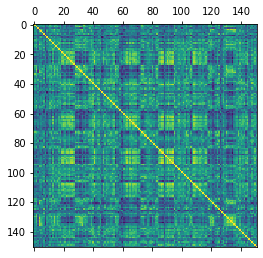

<Figure size 432x288 with 0 Axes>

In [203]:
plt.matshow(min_wage_corr)
plt.show()
plt.savefig(path+'countys/results/corr.png')

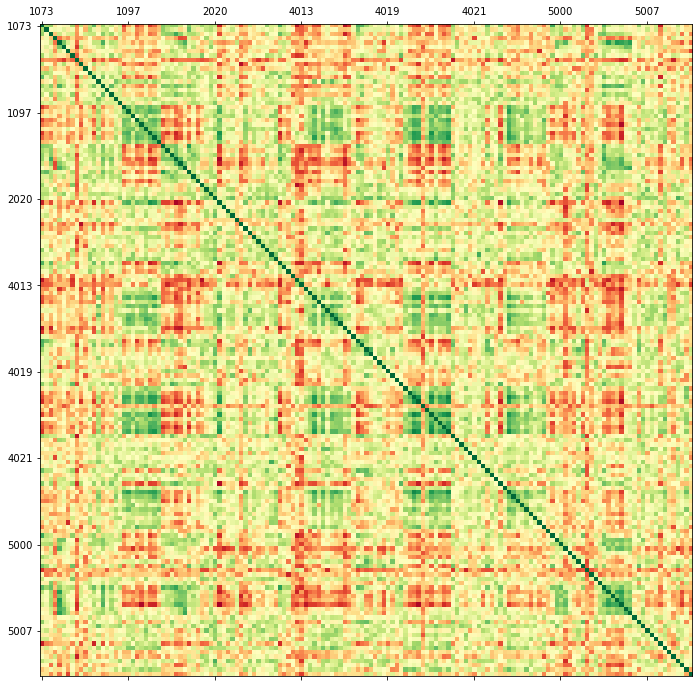

In [189]:
labels = [c for c in min_wage_corr.columns]  # get abbv state names.

fig = plt.figure(figsize=(12,12))  # figure so we can add axis
ax = fig.add_subplot(111)  # define axis, so we can modify
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix
# ax.set_xticks(np.arange(len(labels)))  # show them all!
# ax.set_yticks(np.arange(len(labels)))  # show them all!
ax.set_xticklabels(labels)  # set to be the abbv (vs useless #)
ax.set_yticklabels(labels)  # set to be the abbv (vs useless #)

plt.show()

In [104]:
dfs[0]

,geo_value,time_value,value,stderr,sample_size
0,1001,2020-02-01,0.026371,0.002084,32
1,1003,2020-02-01,0.034427,0.001842,94
2,1005,2020-02-01,0.027970,0.003181,23
3,1007,2020-02-01,0.034143,0.003634,15
4,1009,2020-02-01,0.037567,0.003120,35
...,...,...,...,...,...
742018,72151,2020-09-17,0.085161,0.008655,23
742019,72153,2020-09-17,0.083572,0.007082,27
742020,78010,2020-09-17,0.060095,0.005420,42
742021,78020,2020-09-17,0.089358,0.015421,7


In [128]:
import numpy as np
graph_df = np.empty(10, dtype=object)

In [129]:
graph_df

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

In [198]:
rollingDays=0
for i, df in enumerate(dfs):
    graph_df[i] = pd.DataFrame()

    for region in df['geo_value'].unique()[:16]:
        print(region)
        region_df = df.copy()[df['geo_value']==region]
        region_df.set_index('time_value', inplace=True)
        region_df.sort_index(inplace=True)
        region_df[f"{region}_val" + str(rollingDays)+"ma"] = region_df["value"].rolling(rollingDays).mean()

        if graph_df[i].empty:
            graph_df[i] = region_df[[f"{region}_val"+str(rollingDays) + "ma"]]  # note the double square brackets!
        else:
            graph_df[i] = graph_df[i].join(region_df[f"{region}_val"+ str(rollingDays) + "ma"])

1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029
1031
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029
1031
1000
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1025
1027
1031
1033
1000
1073
1089
1097
2000
2020
4000
4013
4015
4019
4021
4025
5000
5007
5119
5143
1000
4000
4013
4019
5000
6000
6001
6013
6019
6029
6037
6059
6065
6071
6073
6081
1000
1001
1003
1005
1007
1009
1011
1015
1017
1019
1021
1025
1027
1031
1033
1035
1073
5145
6073
12005
12011
12045
12057
12063
12101
12103
13067
13077
13113
13223
13255
20009
1000
1003
1009
1073
1083
1089
1097
1101
1115
1125
4000
4013
4015
4019
4021
4025
1000
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029
1000
1001
1003
1005
1007
1009
1011
1013
1015
1017
1019
1021
1023
1025
1027
1029


In [199]:
for i, k in enumerate(list(signals.keys())):

    graph_df[i].dropna().to_csv(path+'countys/results/'+k+'_ '+ str(rollingDays) + 'D.csv')

In [138]:
import matplotlib.pyplot as plt




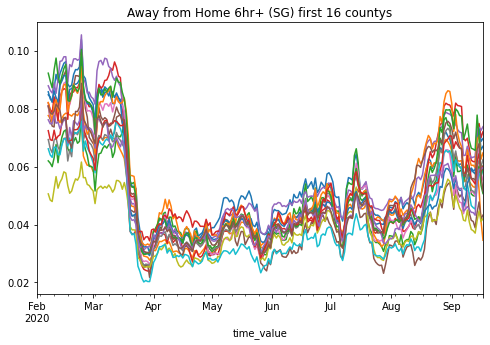

In [139]:
graph_df[0].plot(figsize=(8,5), legend=False, title=signals['c0']+ ' first 16 countys')
plt.savefig(path+'countys/results/'+'c0.png')

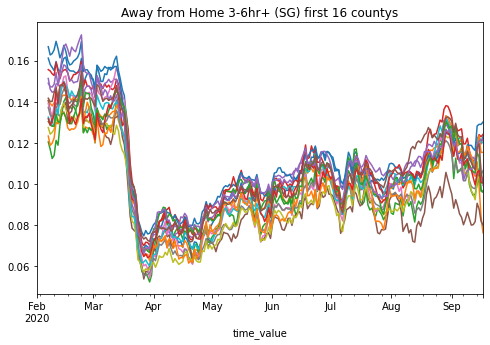

In [140]:
graph_df[1].plot(figsize=(8,5), legend=False, title=signals['c1']+ ' first 16 countys')
plt.savefig(path+'countys/results/'+'c1.png')

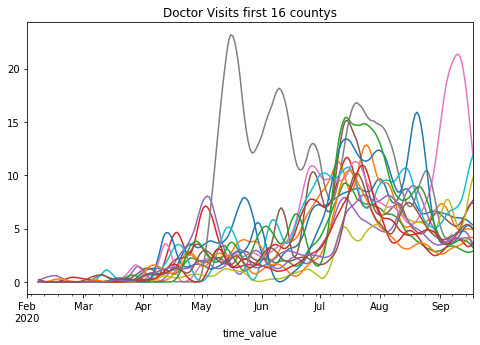

In [141]:
graph_df[2].plot(figsize=(8,5), legend=False, title=signals['c2']+ ' first 16 countys')
plt.savefig(path+'countys/results/'+'c2.png')

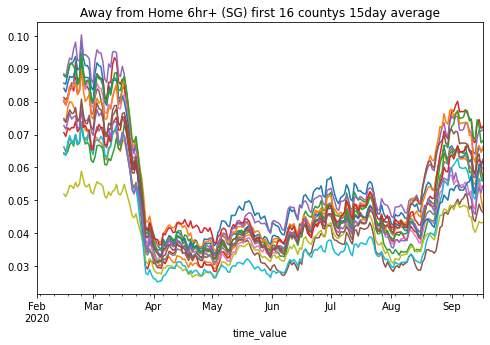

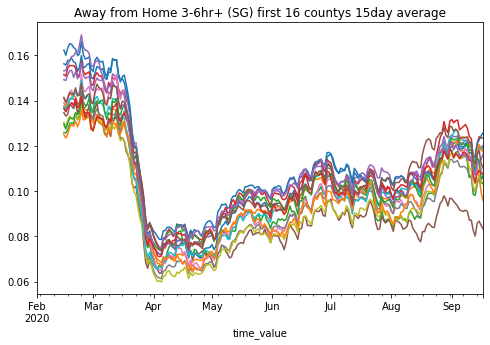

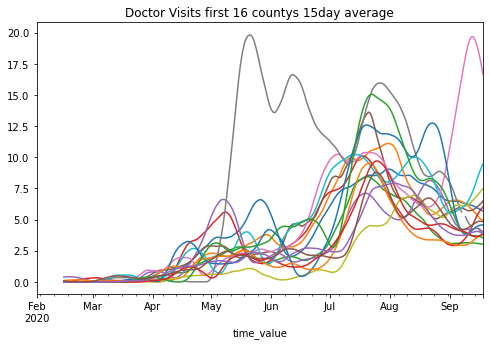

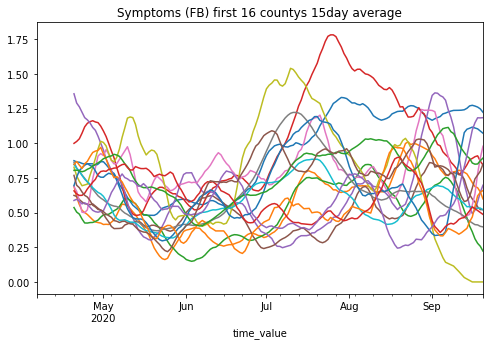

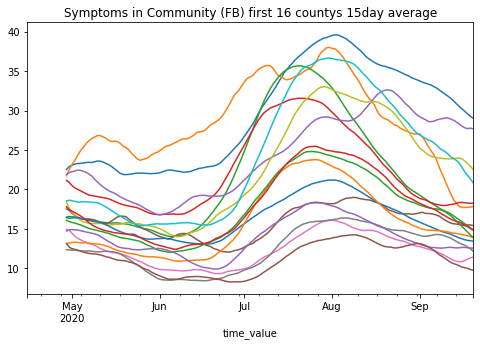

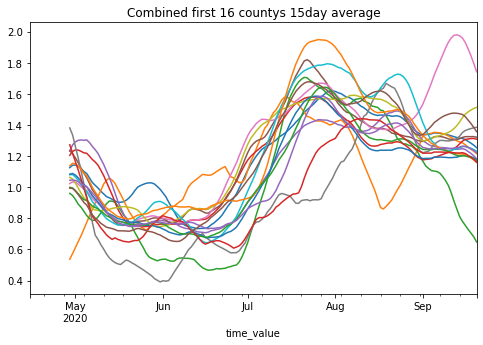

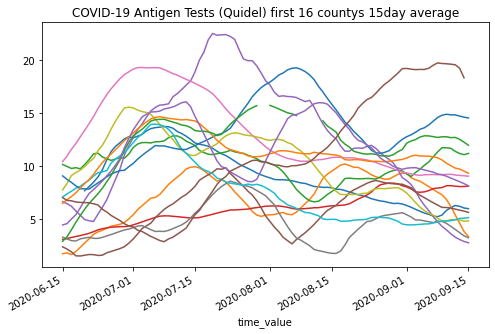

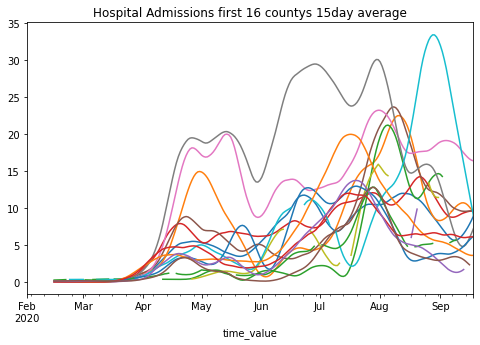

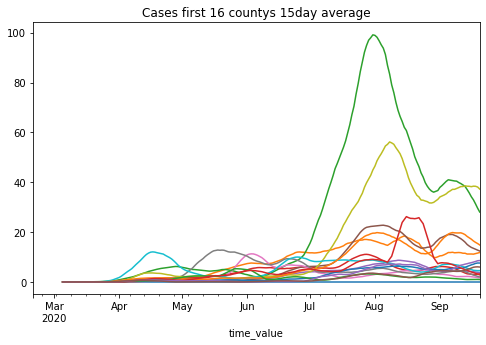

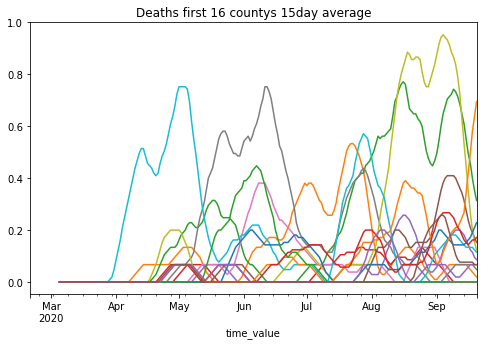

In [149]:
for i, k in enumerate(list(signals.keys())):
    graph_df[i].plot(figsize=(8,5), legend=False, title=signals[k]+ ' first 16 countys 15day average')
    plt.savefig(path+'countys/results/'+k+'15D.png')

In [116]:
result = pd.concat(dfs, axis=1, sort=False)

In [117]:
result

,geo_value,time_value,value,stderr,sample_size,geo_value,time_value,value,stderr,sample_size,...,geo_value,time_value,value,stderr,sample_size,geo_value,time_value,value,stderr,sample_size
0,1001,2020-02-01,0.026371,0.002084,32,1001,2020-02-01,0.109016,0.004623,32,...,1000.0,2020-02-20,0.0,NaN,NaN,1000.0,2020-02-20,0.0,NaN,NaN
1,1003,2020-02-01,0.034427,0.001842,94,1003,2020-02-01,0.107386,0.003159,94,...,1001.0,2020-02-20,0.0,NaN,NaN,1001.0,2020-02-20,0.0,NaN,NaN
2,1005,2020-02-01,0.027970,0.003181,23,1005,2020-02-01,0.089478,0.008151,23,...,1003.0,2020-02-20,0.0,NaN,NaN,1003.0,2020-02-20,0.0,NaN,NaN
3,1007,2020-02-01,0.034143,0.003634,15,1007,2020-02-01,0.099872,0.008529,15,...,1005.0,2020-02-20,0.0,NaN,NaN,1005.0,2020-02-20,0.0,NaN,NaN
4,1009,2020-02-01,0.037567,0.003120,35,1009,2020-02-01,0.102067,0.004136,35,...,1007.0,2020-02-20,0.0,NaN,NaN,1007.0,2020-02-20,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742018,72151,2020-09-17,0.085161,0.008655,23,72151,2020-09-17,0.095240,0.012114,23,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
742019,72153,2020-09-17,0.083572,0.007082,27,72153,2020-09-17,0.085630,0.007068,27,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
742020,78010,2020-09-17,0.060095,0.005420,42,78010,2020-09-17,0.068475,0.006318,42,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
742021,78020,2020-09-17,0.089358,0.015421,7,78020,2020-09-17,0.089358,0.015421,7,...,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [118]:
columnNames = []
for i,c in enumerate(result.columns):
    k=i//5
    columnNames.append(c + '_' + list(signals.keys())[k])

In [119]:
columnNames

['geo_value_c0',
 'time_value_c0',
 'value_c0',
 'stderr_c0',
 'sample_size_c0',
 'geo_value_c1',
 'time_value_c1',
 'value_c1',
 'stderr_c1',
 'sample_size_c1',
 'geo_value_c2',
 'time_value_c2',
 'value_c2',
 'stderr_c2',
 'sample_size_c2',
 'geo_value_c3',
 'time_value_c3',
 'value_c3',
 'stderr_c3',
 'sample_size_c3',
 'geo_value_c4',
 'time_value_c4',
 'value_c4',
 'stderr_c4',
 'sample_size_c4',
 'geo_value_c5',
 'time_value_c5',
 'value_c5',
 'stderr_c5',
 'sample_size_c5',
 'geo_value_c6',
 'time_value_c6',
 'value_c6',
 'stderr_c6',
 'sample_size_c6',
 'geo_value_c7',
 'time_value_c7',
 'value_c7',
 'stderr_c7',
 'sample_size_c7',
 'geo_value_c8',
 'time_value_c8',
 'value_c8',
 'stderr_c8',
 'sample_size_c8',
 'geo_value_c9',
 'time_value_c9',
 'value_c9',
 'stderr_c9',
 'sample_size_c9']

In [120]:
result.columns = columnNames

In [110]:
result.set_index(['geo_value_c0', 'time_value_c0'], inplace=True)

In [121]:
result.head()

,geo_value_c0,time_value_c0,value_c0,stderr_c0,sample_size_c0,geo_value_c1,time_value_c1,value_c1,stderr_c1,sample_size_c1,...,geo_value_c8,time_value_c8,value_c8,stderr_c8,sample_size_c8,geo_value_c9,time_value_c9,value_c9,stderr_c9,sample_size_c9
0,1001,2020-02-01,0.026371,0.002084,32,1001,2020-02-01,0.109016,0.004623,32,...,1000.0,2020-02-20,0.0,NaN,NaN,1000.0,2020-02-20,0.0,NaN,NaN
1,1003,2020-02-01,0.034427,0.001842,94,1003,2020-02-01,0.107386,0.003159,94,...,1001.0,2020-02-20,0.0,NaN,NaN,1001.0,2020-02-20,0.0,NaN,NaN
2,1005,2020-02-01,0.027970,0.003181,23,1005,2020-02-01,0.089478,0.008151,23,...,1003.0,2020-02-20,0.0,NaN,NaN,1003.0,2020-02-20,0.0,NaN,NaN
3,1007,2020-02-01,0.034143,0.003634,15,1007,2020-02-01,0.099872,0.008529,15,...,1005.0,2020-02-20,0.0,NaN,NaN,1005.0,2020-02-20,0.0,NaN,NaN
4,1009,2020-02-01,0.037567,0.003120,35,1009,2020-02-01,0.102067,0.004136,35,...,1007.0,2020-02-20,0.0,NaN,NaN,1007.0,2020-02-20,0.0,NaN,NaN


In [124]:
result.describe()

,geo_value_c0,value_c0,stderr_c0,sample_size_c0,geo_value_c1,value_c1,stderr_c1,sample_size_c1,geo_value_c2,value_c2,...,stderr_c7,sample_size_c7,geo_value_c8,value_c8,stderr_c8,sample_size_c8,geo_value_c9,value_c9,stderr_c9,sample_size_c9
count,742023.000000,742023.000000,731508.000000,742023.000000,742023.000000,742023.000000,731508.000000,742023.000000,455293.000000,455293.000000,...,0.0,0.0,683237.000000,683237.000000,0.0,0.0,683237.000000,683237.000000,0.0,0.0
mean,31484.112363,0.045947,0.006472,67.955518,31484.112363,0.081974,0.009835,67.955518,30352.642775,2.590776,...,NaN,NaN,30376.067403,9.723608,NaN,NaN,30376.067403,0.288484,NaN,NaN
std,16379.315108,0.024172,0.005932,208.299207,16379.315108,0.031995,0.008005,208.299207,15329.999683,3.360578,...,NaN,NaN,15178.851328,58.367183,NaN,NaN,15178.851328,2.648011,NaN,NaN
min,1001.000000,0.005076,0.000000,1.000000,1001.000000,0.006579,0.000000,1.000000,1000.000000,0.000000,...,NaN,NaN,1000.000000,-877.000000,NaN,NaN,1000.000000,-74.000000,NaN,NaN
25%,19037.000000,0.029281,0.002899,10.000000,19037.000000,0.058061,0.004986,10.000000,18043.000000,0.180424,...,NaN,NaN,18175.000000,0.000000,NaN,NaN,18175.000000,0.000000,NaN,NaN
50%,30031.000000,0.041383,0.004912,21.000000,30031.000000,0.077207,0.007948,21.000000,29169.000000,1.514184,...,NaN,NaN,29177.000000,0.571429,NaN,NaN,29177.000000,0.000000,NaN,NaN
75%,46119.000000,0.054647,0.008032,48.000000,46119.000000,0.100359,0.012187,48.000000,45043.000000,3.736933,...,NaN,NaN,45077.000000,4.000000,NaN,NaN,45077.000000,0.000000,NaN,NaN
max,78030.000000,0.342857,0.216667,6413.000000,78030.000000,0.375000,0.209064,6413.000000,72000.000000,87.670832,...,NaN,NaN,72000.000000,3697.428571,NaN,NaN,72000.000000,244.771429,NaN,NaN


In [ ]:
graph_df = pd.DataFrame()

for region in result['geo_value_c0'].unique():
    region_df = df.copy()[result['geo_value_c0']==region]
    region_df.set_index('time_value_c0', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_ma"] = region_df["value_c0"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets! (so df rather than series)
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

graph_df.tail()